<a href="https://colab.research.google.com/github/shnsenanur/BatMobilApp/blob/master/studentGrade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checking whether we're using Colab GPU

In [1]:
# from runtime bar change runtime type to GPU, it must say connected on the right
# output of the code below will tell us if it see a GPU
'''
import tensorflow as tf 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('no such GPU here')
print('working over GPU: {}'.format(device_name))


SyntaxError: ignored


# Connecting Drive to Colab for the file access

In [2]:
# connecting to Google Drive for accesing the data set csv file    
'''
from google.colab import drive
drive.mount('/content/drive')
!ls

SyntaxError: ignored

# Importing the Libraries



In [1]:
# importing the required librarires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#setting the theme to more visible grid
sns.set_theme(style="darkgrid")

# Get to know your data

Why do we need the data?
What kind of data is required?
How to get the data?
What to do with the data?



In [3]:
# dowloading the data set csv file
path = '/content/drive/MyDrive/studentGrade/student-mat.csv'
df_backup = pd.read_csv(path, ';')


# creating a backup data frame for our DM tests
df = df_backup.copy()

In [3]:
# check how your variables, features are looking
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [6]:
df1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
# size of your data set
df1.shape

(395, 33)

In [8]:
# our data set considers numeric and categorical types, we will convert them all to the required type in the data cleaning step
df1.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

TypeError: ignored

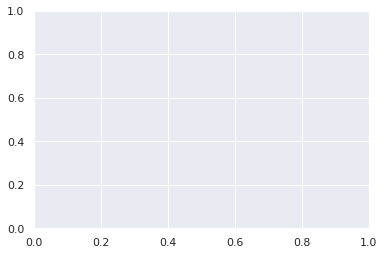

# Size Reduction and Classification

**Questions have to be like:**

 Are there any missing values? 
 Shall we delete some of the features? Are they useful for our problem?


Then apply,

Exploratory Data Analysis
 + put your data types in an order

 + see how the variance behaves between features and data itself
 + visualize by plots to define cumulations

 + calculate the Correlation and show them on heatmaps 

 + take the outputs over 0.8 as important Correlation

Feature Selection


 + do select features that you will move on with

Others

 + apply PCA and LDA to identify attributes that account for the most variance between classes 


In [ ]:
# are there any missing values in your code
df1.isnull().sum()

In [ ]:
# how many answer types are there in your feature and which one is more
df['paid'].value_counts()

In [5]:
# Encoding 
# categoric variables to numeric

maplenecekler = {
    "school": {
        "GP":1,
        "MS":2
    },
    "sex": {
            "F": 1, 
            "M": 2
    },
    "address": {
        "U": 1,
        "R":2
    },
    "famsize": {
        "GT3":1,
        "LE3":2
    },
    "Pstatus": {
        "T":1,
        "A":2
    },
    "Mjob": {
        "other":1,
        "services":2,
        "at_home":3,
        "teacher":4,
        "health":5
    },
    "Fjob": {
        "other":1,
        "services":2,
        "teacher":3,
        "at_home":4,
        "health":5
    },
    "reason": {
        "course":1,
        "home":2,
        "reputation":3,
        "other": 4
    },
    "guardian": {
        "mother":1,
        "father":2,
        "other":3
    },
    "schoolsup": {
        "no":1,
        "yes":2
    },
    "famsup": {
        "yes":1,
        "no":2
    },
    "paid": {
        "no":1,
        "yes":2
    },
    "activities": {
        "yes":1,
        "no":2
    },
    "nursery": {
        "yes":1,
        "no":2
    },
    "higher": {
        "yes":1,
        "no":2
    },
    "internet": {
        "yes":1,
        "no":2
    },
    "romantic": {
        "no":1,
        "yes":2
    }
}

df1 = df.replace(maplenecekler)
df1.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1.116456,1.473418,16.696203,1.222785,1.288608,1.103797,2.749367,2.521519,2.344304,1.762025,2.081013,1.389873,1.448101,2.035443,0.334177,1.129114,1.387342,1.458228,1.491139,1.205063,1.050633,1.167089,1.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.324481,1.087108,0.996705,0.633176,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,1.000000,2.000000,18.000000,1.000000,2.000000,1.000000,4.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,2.000000,2.000000,22.000000,2.000000,2.000000,2.000000,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
# G3 has values from 0 to 20. it has to be converted to a scale 0-1-2-3-4 , where 0 is the highest grade gap 
def new_values(value):
  if 16 <= value <= 20:
    return 0
  elif 14 <= value <= 15:
    return 1
  elif 12 <= value <= 13:
    return 2
  elif 10 <= value <= 11:
    return 3
  elif 0 <= value <= 9:
    return 4


In [7]:
df1['G3'] = df1['G3'].apply(lambda x: new_values(x))
df1['G3'].value_counts()

4    130
3    103
2     62
1     60
0     40
Name: G3, dtype: int64

# 1- Correlation and Heatmaps
By checking correlation we ease to drop unnecessary or ascendent values

To see them we create heatmaps by correlation values we just calculated


In [10]:
# calculating the correlation

corr_df = df1.corr()
corr_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,0.279797,0.064866,-0.045923,-0.133333,-0.079807,-0.040798,-0.000386,-0.013689,0.075705,0.242308,-0.090681,0.059804,-0.139789,0.164967,-0.017083,0.116946,0.089277,0.024150,0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,0.070469
sex,-0.012286,1.000000,-0.028606,0.028504,0.089862,-0.023443,0.078228,0.034878,0.033023,-0.072381,-0.061885,-0.015285,0.059722,-0.306268,0.044436,-0.138271,0.151623,-0.129126,-0.099833,0.008203,0.151056,-0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,-0.111285
age,0.377610,-0.028606,1.000000,0.146722,0.037847,-0.029598,-0.163658,-0.163438,-0.071608,-0.050419,0.003435,0.269479,0.070641,-0.004140,0.243665,-0.251811,0.140609,-0.035933,0.103063,0.086632,0.209081,0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,0.179495
address,0.279797,0.028504,0.146722,1.000000,-0.072472,-0.042572,-0.138804,-0.072178,-0.051967,-0.067570,0.035882,-0.070318,0.328096,0.020912,0.078578,-0.024712,0.023903,-0.052800,-0.051360,0.059589,0.042854,0.216842,-0.005257,-0.014258,-0.034878,-0.068835,0.093494,0.101126,0.040355,0.027874,-0.069704,-0.126037,0.105295
famsize,0.064866,0.089862,0.037847,-0.072472,1.000000,0.149612,-0.043068,-0.058879,0.053850,0.010956,-0.029385,-0.030443,0.063493,-0.073595,-0.015769,-0.028642,0.112893,-0.013882,0.000113,-0.102088,0.005806,-0.000720,0.034395,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,-0.051251
Pstatus,-0.045923,-0.023443,-0.029598,-0.042572,0.149612,1.000000,0.123565,0.088730,-0.050930,0.051658,-0.002681,-0.026053,-0.028265,-0.024294,0.003339,0.042238,0.019067,-0.046435,0.097352,-0.090615,-0.040735,0.070074,0.040451,-0.025179,-0.038717,-0.003459,0.030590,-0.006045,-0.022307,0.134937,0.016868,0.041382,-0.025546
Medu,-0.133333,0.078228,-0.163658,-0.138804,-0.043068,0.123565,1.000000,0.623455,0.381748,0.131032,0.097743,-0.133291,-0.171639,0.064944,-0.236680,-0.036029,-0.183727,0.159700,-0.108277,-0.193263,-0.168845,-0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,-0.225312
Fedu,-0.079807,0.034878,-0.163438,-0.072178,-0.058879,0.088730,0.623455,1.000000,0.262512,0.278960,0.026469,-0.004840,-0.158194,-0.009175,-0.250408,0.037530,-0.185496,0.086981,-0.112643,-0.157177,-0.174566,-0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,-0.156111
Mjob,-0.040798,0.033023,-0.071608,-0.051967,0.053850,-0.050930,0.381748,0.262512,1.000000,0.217458,0.038418,-0.093889,-0.068523,-0.001873,-0.099075,-0.100220,-0.132313,0.148579,-0.087266,-0.113237,-0.042651,-0.080668,-0.018047,-0.067160,0.021064,0.015827,-0.043925,0.030361,0.015985,-0.057084,0.162458,0.122728,-0.114741
Fjob,-0.000386,-0.072381,-0.050419,-0.067570,0.010956,0.051658,0.131032,0.278960,0.217458,1.000000,0.095138,0.068761,-0.123440,0.087162,-0.001844,0.098302,-0.088982,0.005023,-0.017878,-0.113911,-0.013193,-0.008086,0.056416,-0.052689,-0.025403,-0.056134,0.005806,-0.135295,0.043857,-0.028404,0.135356,0.083860,-0.070835


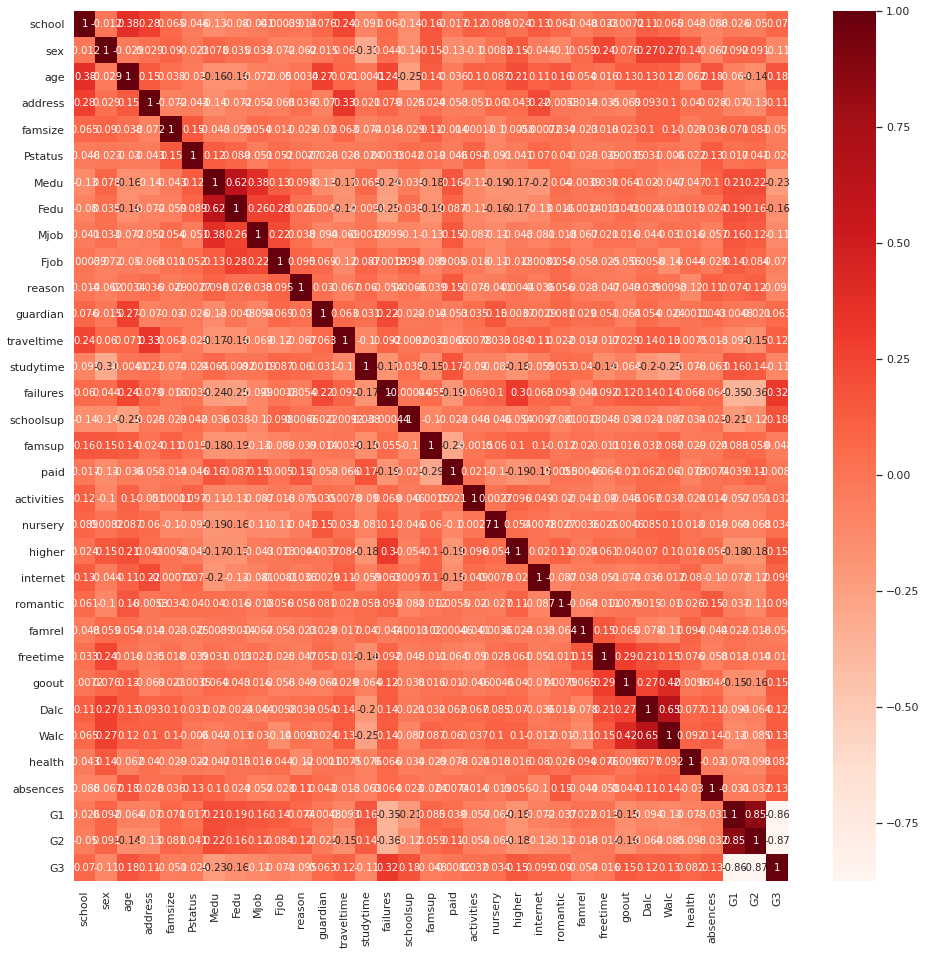

In [11]:
# checking it over a heatmap

plt.figure(figsize=(16,16))
corr_df = df1.corr()
sns.heatmap(corr_df, annot=True, cmap=plt.cm.Reds )
plt.show()

In [12]:
# defining a filter-scale for choosing features

corr_df = corr_df[(corr_df > 0.8) & (corr_df < 1.0)]

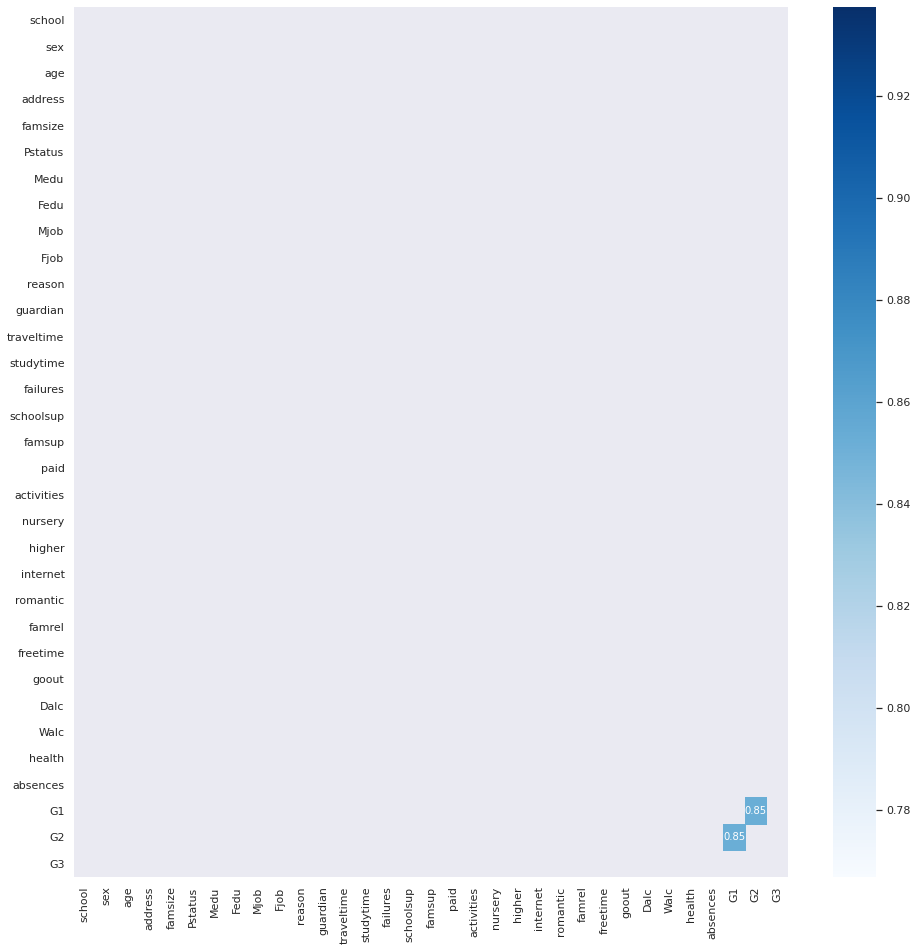

In [13]:
# the heatmap after scaling

plt.figure(figsize=(16,16))
ax = sns.heatmap(corr_df, annot=True, cmap=plt.cm.Blues ,linewidths=0.0)
ax.figure.savefig("outputHeat.png")
plt.show()

Understanding from the Heatmap

G1-G2 attribute by 0.85 so we can ease the data set by only considering one of them


# 2- PCA and LDA
The biggest difference between LDA and PCA is that there is no class difference for PCA.

So PCA is working by more random results 

But for LDA, classes are important. LDA finds the algorithm that best expresses classes. PCA finds the algorithm that best expresses the whole data set combination.

In [ ]:
# defining the place we're working on the df1

X= df1.iloc[:,0:32].values
Y= df1.iloc[:,32].values

In [ ]:
# importing the traint_test_split module from sklearn for prior processing

from sklearn.model_selection import train_test_split 


# splitting the set for test and train
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33, random_state=0)

In [ ]:
# here we see the first version before that shape is manipulated by StandartScaler

x_train.shape
x_test.shape
y_train.shape

In [ ]:
# scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [ ]:
# clearly X_train has changed

X_train

In [ ]:
#PCA

from sklearn.decomposition import PCA
pca = PCA(0.5)
X_train2 = pca.fit_transform(X_train)

# apply the scaling to the test data set too so that it'll match with the test results on the same dimension
X_test2 = pca.transform(X_test) 

In [ ]:
# clearly X_test2 have been manipulated too

X_test2.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

# PCA applied data
lr2 = LogisticRegression(random_state=0)
lr2.fit(X_train2,y_train)

# predictions
y_pred = lr.predict(X_test)
y_pred2 = lr2.predict(X_test2)


# checking stats by confusion matrix
from sklearn.metrics import confusion_matrix
print ("Original Precision Matrix:")
cm1 = confusion_matrix(y_test, y_pred)
print (cm1)
print ("PCA Applied Precision:")
cm2 = confusion_matrix(y_test, y_pred2)
print (cm2)


In [ ]:
# checking the heatmaps of last results
plt.figure(figsize=(10,10))
ax = sns.heatmap(cm1, annot=True, cmap=plt.cm.Blues ,linewidths=0.0)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
ax.figure.savefig("cm1_heat.png")
plt.show()

In [ ]:
# checking the heatmaps of last results
plt.figure(figsize=(10,10))
ax = sns.heatmap(cm2, annot=True, cmap=plt.cm.Blues ,linewidths=0.0)
ax.figure.savefig("cm2_heat.png")
plt.show()

In [ ]:

# score logistic reg 

# score calculates the linear coefficients that maximizes the score
# linear coefficients calculated by cov and mean vectors
score = lr.score(X_test, y_test)
print(score)

In [ ]:
# score logistic reg 2
score = lr2.score(X_test2, y_test)
print(score)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

#PCA applied data
lr2 = LogisticRegression(random_state=0)
lr2.fit(X_train2,y_train)

#Precisions
y_pred = lr.predict(X_test)
y_pred2 = lr2.predict(X_test2)

In [ ]:

from sklearn.metrics import confusion_matrix

print ("Original Prediction Matrix:")
cm1 = confusion_matrix(y_test, y_pred)
print (cm1)
print ("PCA Applied Matrix:")
cm2 = confusion_matrix(y_test, y_pred2)
print (cm2)

#LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA library method
lda = LinearDiscriminantAnalysis(n_components=2) #2D formatted
X_train3 = lda.fit_transform(X_train, y_train)
X_test3 = lda.fit_transform(X_test, y_test)

#LDA takes y values too unlike PCA
#LDA Applied Logistic Regression Values
lr3 = LogisticRegression(random_state=0)
lr3.fit(X_train3, y_train)
y_pred3 = lr3.predict(X_test3)


print ("LDA Applied Precision:")
cm3 = confusion_matrix(y_test, y_pred3)
print (cm3)


In [ ]:
# Mahalanobis Distance
# this is written to understand the math behind LDA
# when considering 2 class, Mahalanobis output is expected to be less than 3 for good classification
# less than 3 means the classification is fiiiine 

import scipy as sp

def mahalanobis(x=None, data=None, cov=None):

    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df1_x = df1[['G2', 'G3','G1']].head(395)
df1_x['mahala'] = mahalanobis(x=df1_x, data=df1[['G2', 'G3','G1']])
df1_x.head()

# Hyperparameters and Model Validation
After choosing the model , amongst the various algorithms present. We need to tune the hyper parameters of each model to achieve the desired performance.

In the end we need to evaluate the model by measuring the accuracy and relevance (Does it answer the original question that is set out to answer?)

We also need to make sure there is a correct balance between performance and generalizability, which means the model created should not be biased and should be a generalized model

 In order to make an informed choice, we need a way to validate that our model and our hyperparameters are a good fit to the data. While this may sound simple, there are some pitfalls that you must avoid to do this effectively.

In [ ]:
df1 = df1.drop("G1", axis=1)
X = df1.iloc[:,:-1]
y = df1.G3

In [ ]:
df1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

accuracy score is 1.0, this surely is not we want cause it trains and evaluates the model on the same data. 

furthermore, the nearest neighbor model is an instance-based estimator that simply stores the training data, and predicts labels by comparing new data to these stored points: except in contrived cases, it will get 100% accuracy every time!

In [ ]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

In [ ]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [ ]:
# Load and split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier(random_state=42))])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
			('clf', svm.SVC(random_state=42))])

pipe_svm_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', svm.SVC(random_state=42))])
			

In [ ]:
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range}]

In [ ]:
# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=10) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=10)
			
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)


In [ ]:
# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_svm_pca]

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
		2: 'Random Forest', 3: 'Random Forest w/PCA', 
		4: 'Support Vector Machine', 5: 'Support Vector Machine w/PCA'}

In [ ]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, y_train)

In [ ]:
# Best params
print('Best params: %s' % gs.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % gs.best_score_)
# Predict on test data with best params
y_pred = gs.predict(X_test)
# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))

In [ ]:
	
	# Track best (highest test accuracy) model
	if accuracy_score(y_test, y_pred) > best_acc:
		best_acc = accuracy_score(y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])



In [ ]:

# Save best grid search pipeline to file
dump_file = 'best_gs_pipeline.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

In [ ]:
'''
pip install lazypredict

In [ ]:
'''
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
'''
data = df1
X = df1.iloc[:,:-1]
y = df1.G3
# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)

In [ ]:
# Defines and builds the lazyclassifier
'''
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)



In [ ]:
# Prints the model performance
models_train

In [ ]:
models_test

In [ ]:
'''
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

boston = datasets.load_boston()
X, y = shuffle(X, y, random_state=13)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

In [11]:
import numpy as np

def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    S = rng.rand(N, 1) ** 2
    s = 10 - 1. / (S.ravel() + 0.1)
    if err > 0:
        s += err * rng.randn(N)
    return S, s

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [14]:
S, s = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(S, s)
model20 = PolynomialRegression(20).fit(S, s)


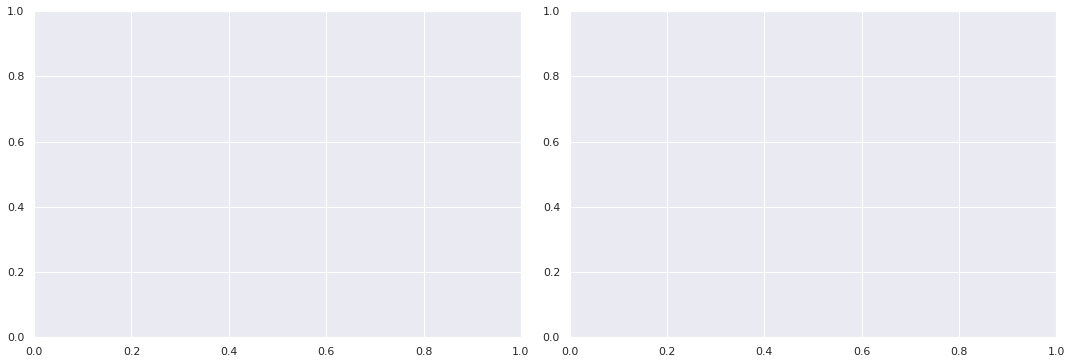

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

In [ ]:

ax[0].scatter(S.ravel(), s, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(S.ravel(), s, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)

fig.savefig('figures/05.03-bias-variance.png')